NAME: SUPROBHO GUPTA

ROLL NUMBER: M22AI651

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!nvidia-smi

Sat Apr 29 17:39:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Setting Training and Testing path

In [6]:
train_path='/content/drive/MyDrive/Machine Learning Datasets/GurNum/train'
test_path='/content/drive/MyDrive/Machine Learning Datasets/GurNum/val'


Importing necessary libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Creating Labels

In [8]:
import numpy as np

def create_label(image_name):
    """ Create an one-hot encoded vector from image name """ 
    if image_name == '0':  
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif image_name == '1':
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif image_name == '2':
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif image_name == '3':
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif image_name == '4':
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif image_name == '5':
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif image_name == '6':
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif image_name == '7':
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif image_name == '8':
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif image_name == '9':
        return np.array([0,0,0,0,0,0,0,0,0,1])

Logic for importing images

In [9]:
import os
import cv2
from random import shuffle
from tqdm import tqdm

def create_data():
    data = []
    for folder in tqdm(os.listdir("/content/drive/MyDrive/Machine Learning Datasets/GurNum")):
      for folder1 in tqdm(os.listdir("/content/drive/MyDrive/Machine Learning Datasets/GurNum/"+folder)):
        for img in os.listdir("/content/drive/MyDrive/Machine Learning Datasets/GurNum/"+folder+"/"+folder1):
            path = os.path.join("/content/drive/MyDrive/Machine Learning Datasets/GurNum",folder,folder1,img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            try:
                img_data = cv2.resize(img_data, (28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data), create_label(folder1)])
    shuffle(data)
    return data

In [10]:
data = create_data()

100%|██████████| 2/2 [01:34<00:00, 47.20s/it]


Diving the data in Training and testing Data( in the ratio how it is divided in the dataset)

In [11]:
train = data[:1000]
test = data[1000:]
X_train = np.array([i[0] for i in train]).reshape(-1, 28,28, 1)
y_train = np.array([i[1] for i in train])
X_test = np.array([i[0] for i in test]).reshape(-1, 28,28, 1)
y_test = np.array([i[1] for i in test])

Sample image from dataset

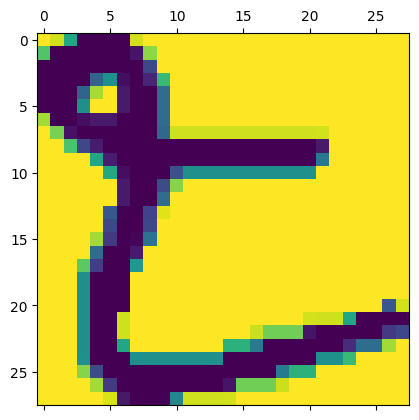

In [12]:
import matplotlib.pyplot as plt
plt.matshow(X_train[100])


Flattening the array

In [13]:

x_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
X_train_flattened=x_train.reshape(len(x_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened[0]

array([255., 255., 255., 246., 237., 237., 237., 237., 237., 237., 237.,
        85.,   0.,   0., 237., 237., 237., 237., 237., 237., 254., 255.,
       255., 255., 255., 255., 255., 255., 255., 243., 200., 100.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 186., 200., 212., 255., 255., 255., 255.,
       255., 248., 129.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  55., 255., 255., 255., 255., 255., 118.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  27., 128., 128., 128., 128., 128., 128.,
       128., 128.,  64.,   0.,   0.,   0.,   0.,  27., 128., 191., 255.,
       255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 164., 183.,
       255., 255., 255., 255., 255., 255., 255., 255., 127.,   0.,   0.,
         0.,   0.,   0.,   0., 127., 255., 255., 255.,   0.,   0.,   0.,
         0.,   0.,   0., 186., 255., 255., 255., 25

Creating a Nural network nad fitting our model

In [15]:
#X_train_flattened=np.array(X_train_flattened)
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
32/32 [==============================] - 5s 3ms/step - loss: 31.0580 - accuracy: 0.3230
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 7.9176 - accuracy: 0.6190
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 4.2351 - accuracy: 0.8030
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 2.6107 - accuracy: 0.8630
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 1.9426 - accuracy: 0.8910
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 1.3775 - accuracy: 0.9210
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 1.1769 - accuracy: 0.9240
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 1.0128 - accuracy: 0.9420
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7791 - accuracy: 0.9550
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.9550
Epoch 11/20
32/32 

Evaluation

In [16]:
model.evaluate(X_test_flattened,y_test)

6/6 [==============================] - 1s 6ms/step - loss: 1.5378 - accuracy: 0.9438


[1.5377706289291382, 0.9438202381134033]

we are getting 93% accuracy on testing set